#Import Libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


#Import Dataset

In [5]:
df=pd.read_csv("/Titanic-Dataset.csv")


#Check the null values

In [6]:
df.isnull().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
M_age = df['Age'].median()
df['Age'].fillna(M_age, inplace=True)

df['Cabin'].fillna('Unknown', inplace=True)

mode_em = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_em, inplace=True)

In [9]:
df.isnull().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

#Data Visualization


Let's visualize some of the data, for example, age distribution, survival rate, etc.

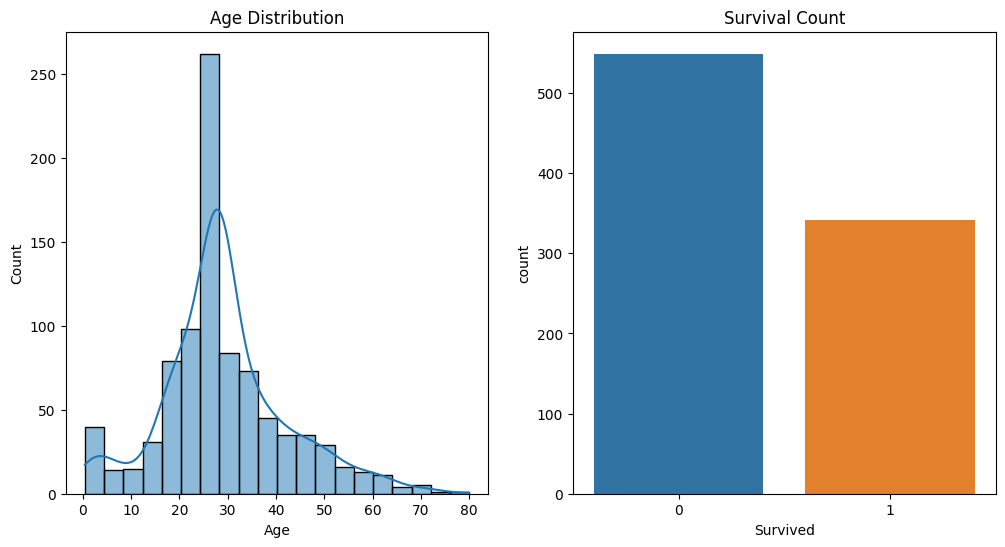

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')

plt.show()

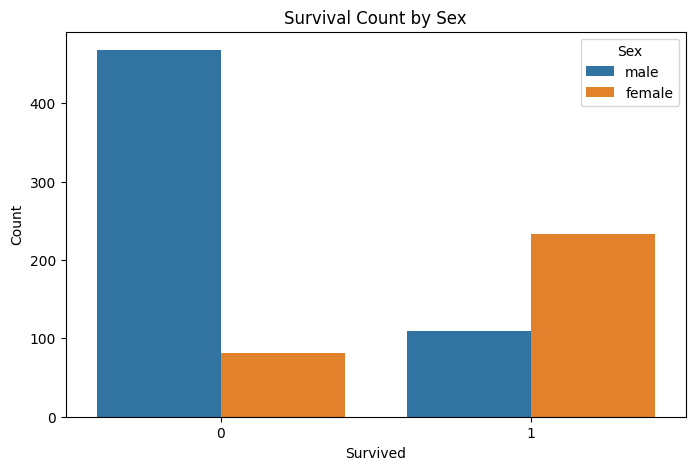

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

<ipython-input-12-cb15ebe1fe06>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


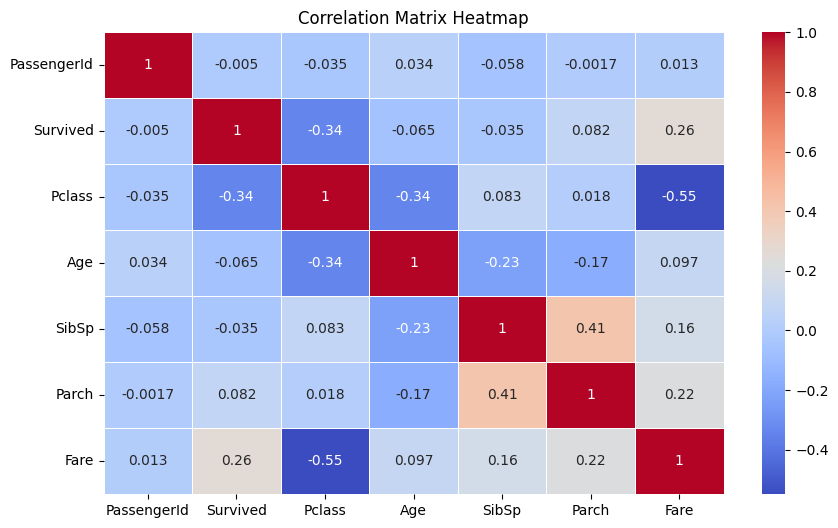

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<ipython-input-13-e83c6ba5534a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex', ci=None)


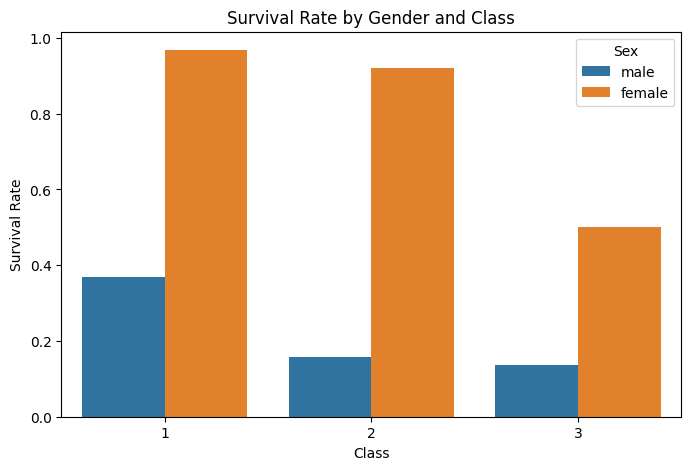

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex', ci=None)
plt.title('Survival Rate by Gender and Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

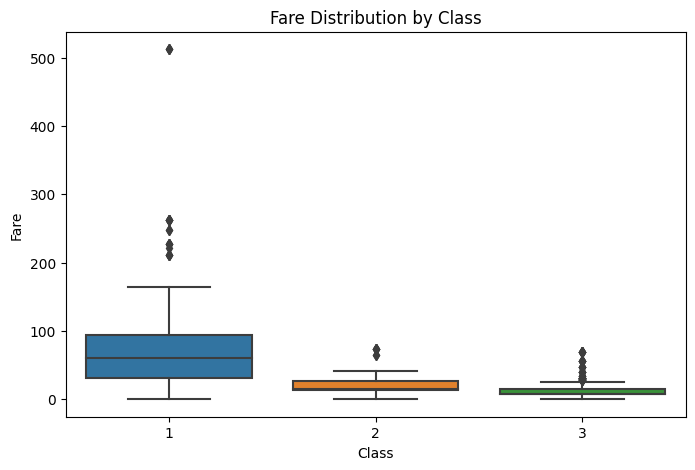

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.show()

#Outlier Detection

You can choose a specific numerical column for each of these

<Axes: xlabel='Fare'>

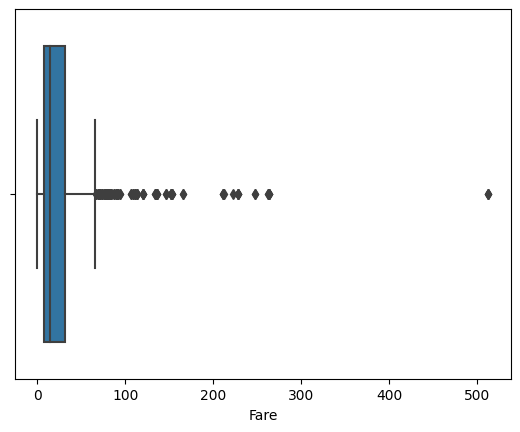

In [15]:
sns.boxplot(x=df['Fare'])

<Axes: xlabel='Age'>

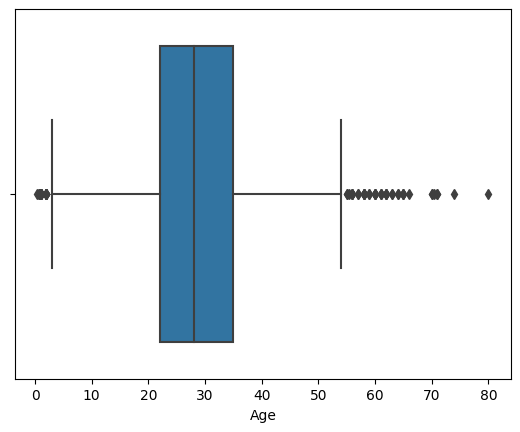

In [16]:
sns.boxplot(x=df['Age'])


OUTLINERS EXIST IN BOTH

#Splitting of Dependent variables and Independent Variables

In [17]:
A = df.drop('Survived', axis=1)
B = df['Survived']

#Perform Encoding for Categorical Variables
 (e.g., 'Sex', 'Embarked')

In [18]:
label_en = LabelEncoder()
A['Sex'] = label_en.fit_transform(A['Sex'])
A['Embarked'] = label_en.fit_transform(A['Embarked'])

#Feature Scaling

In [19]:
ruler = StandardScaler()
A[['Age', 'Fare']] = ruler.fit_transform(A[['Age', 'Fare']])
A.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,-0.565736,1,0,A/5 21171,-0.502445,Unknown,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,1,0,PC 17599,0.786845,C85,0
2,3,3,"Heikkinen, Miss. Laina",0,-0.258337,0,0,STON/O2. 3101282,-0.488854,Unknown,2
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,113803,0.420730,C123,2
4,5,3,"Allen, Mr. William Henry",1,0.433312,0,0,373450,-0.486337,Unknown,2


#Splitting Data into Train and Test

In [20]:
Atrain, Atest, Btrain, Btest = train_test_split(A, B, test_size=0.2, random_state=42)


In [21]:
Atrain.shape

(712, 11)

In [22]:
Atest.shape


(179, 11)

In [23]:
Btrain.shape

(712,)

In [24]:
Btest.shape

(179,)

In [25]:
Atrain

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,1,"Partner, Mr. Austen",1,1.240235,0,0,113043,-0.074583,C124,2
733,734,2,"Berriman, Mr. William John",1,-0.488887,0,0,28425,-0.386671,Unknown,2
382,383,3,"Tikkanen, Mr. Juho",1,0.202762,0,0,STON/O 2. 3101293,-0.488854,Unknown,2
704,705,3,"Hansen, Mr. Henrik Juul",1,-0.258337,1,0,350025,-0.490280,Unknown,2
813,814,3,"Andersson, Miss. Ebba Iris Alfrida",0,-1.795334,4,2,347082,-0.018709,Unknown,2
...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,"Salkjelsvik, Miss. Anna Kristine",0,-0.642586,0,0,343120,-0.494391,Unknown,2
270,271,1,"Cairns, Mr. Alexander",1,-0.104637,0,0,113798,-0.024246,Unknown,2
860,861,3,"Hansen, Mr. Claus Peter",1,0.894411,2,0,350026,-0.364355,Unknown,2
435,436,1,"Carter, Miss. Lucile Polk",0,-1.180535,1,2,113760,1.767741,B96 B98,2


In [26]:
Btrain

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64